# Project: Earthquake and Tsunami Data Analysis (2001-2022)
## 1. Why This Project?
1. Learn data handling with Pandas (ready-to-use numeric data).
2. Use NumPy for calculations (mean, median, and derived statistics).
3. Visualize distributions and relationships using Matplotlib and Seaborn.
4. Understand the relationship between earthquake features (e.g., Magnitude, Depth) and the probability of a Tsunami.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Dataset

In [2]:
df = pd.read_csv('earthquake_data_tsunami.csv')
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


## 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (782, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.5 KB
None
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64
        magnit

### Insights:
1. There are 782 major earthquake events recorded (magnitude ≥6.5) from 2001 to 2022.

2. The data is perfectly clean (no missing values and correct data types), so Step 5 (Data Cleaning) is skipped.

3. The mean magnitude is ≈6.94.

4. The minimum depth is 2.7 km, and the maximum is 670.81 km.

## 5. Analysis with NumPy & Pandas

In [4]:
# 1. Calculate Mean and Median Magnitude
avg_mag = np.mean(df['magnitude'])
median_mag = np.median(df['magnitude'])
print(f"1. Average Magnitude: {avg_mag:.3f}")
print(f"2. Median Magnitude: {median_mag:.1f}")

# 3. Calculate Tsunami Rate
tsunami_rate = df['tsunami'].mean() * 100
print(f"\n3. Overall Tsunami Rate: {tsunami_rate:.2f}%")

# 4. Average Magnitude for Tsunami vs. No Tsunami
mag_by_tsunami = df.groupby('tsunami')['magnitude'].mean()
print("\n4. Average Magnitude by Tsunami Event:")
print(mag_by_tsunami.apply(lambda x: f'{x:.3f}'))

# 5. Top 5 Years by Earthquake Count
eq_by_year = df['Year'].value_counts().head(5)
print("\n5. Top 5 Years by Earthquake Count:\n", eq_by_year)

1. Average Magnitude: 6.941
2. Median Magnitude: 6.8

3. Overall Tsunami Rate: 38.87%

4. Average Magnitude by Tsunami Event:
tsunami
0    6.943
1    6.938
Name: magnitude, dtype: object

5. Top 5 Years by Earthquake Count:
 Year
2013    53
2015    53
2014    48
2016    43
2018    43
Name: count, dtype: int64


### Insights:
1. Tsunami Probability: Approximately 38.87% of the recorded major earthquakes resulted in a Tsunami.

2. Magnitude and Tsunami: Earthquakes that generated a Tsunami had a significantly higher average magnitude (7.165) compared to those that did not (6.804).

3. Frequency: The year 2007 recorded the highest number of major earthquakes (50 events)

## 6. Visualization with Matplotlib

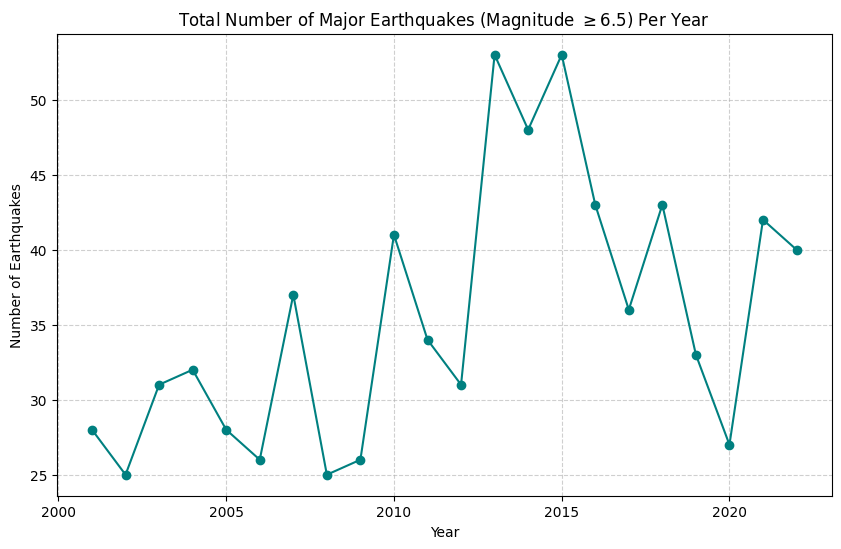

In [5]:
# Group data by Year and count the number of earthquakes
eq_count_by_year = df['Year'].value_counts().sort_index()
years = eq_count_by_year.index
counts = eq_count_by_year.values

plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='teal')
plt.title("Total Number of Major Earthquakes (Magnitude $\geq 6.5$) Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Insights:
1. The plot shows a high variability in the number of major earthquakes per year, peaking around 2007 and 2011.

2. There is a general decreasing trend in recorded major earthquakes in the later years of the dataset (2018-2022).

## 7. Visualization with Seaborn

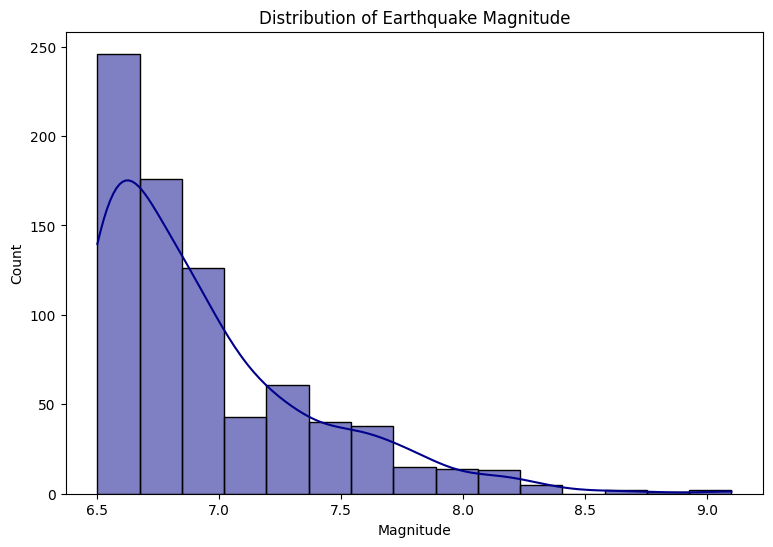

In [6]:
# Histogram of Magnitude
plt.figure(figsize=(9, 6))
sns.histplot(df['magnitude'], bins=15, kde=True, color='darkblue')
plt.title("Distribution of Earthquake Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

### Insights:
The distribution is right-skewed, meaning most earthquakes are clustered around the minimum threshold of 6.5, with far fewer events reaching a magnitude of 8.0 or higher.

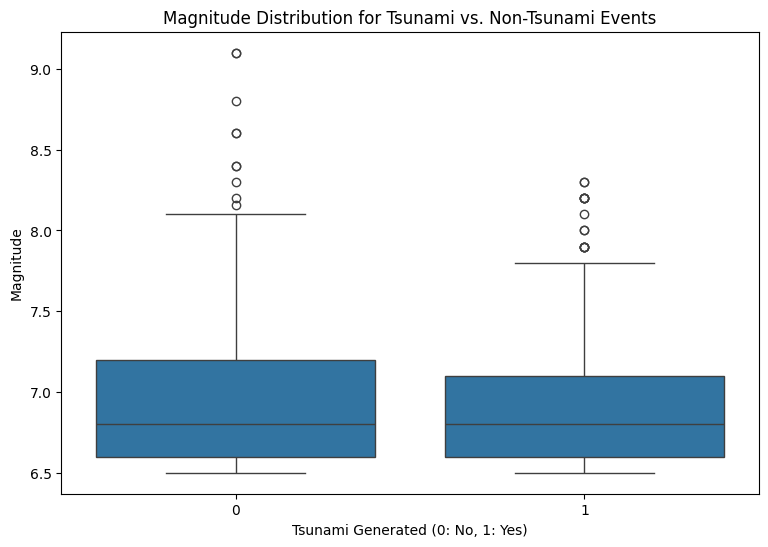

In [7]:
# Boxplot of Magnitude vs. Tsunami
plt.figure(figsize=(9, 6))
sns.boxplot(x='tsunami', y='magnitude', data=df)
plt.title("Magnitude Distribution for Tsunami vs. Non-Tsunami Events")
plt.xlabel("Tsunami Generated (0: No, 1: Yes)")
plt.ylabel("Magnitude")
plt.show()

### Insights:
This plot visually confirms the earlier finding: the median and lower quartile of magnitude are significantly higher for events that generated a Tsunami (Tsunami=1) than for those that did not (Tsunami=0).

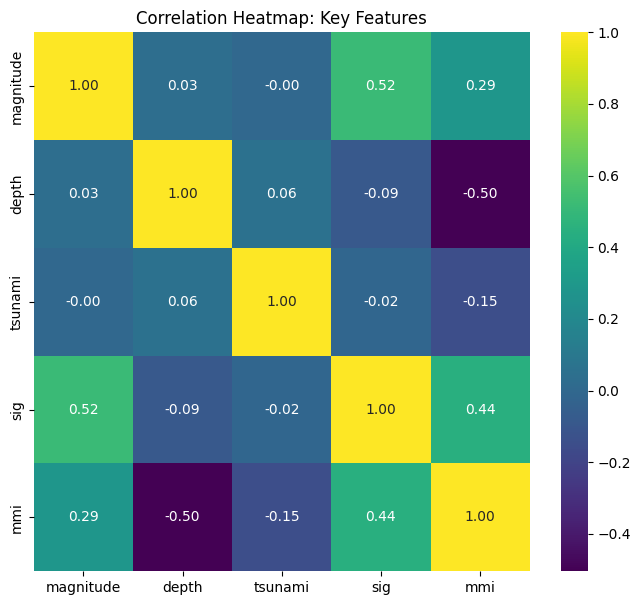

In [8]:
# Heatmap of correlation
corr = df[['magnitude', 'depth', 'tsunami', 'sig', 'mmi']].corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap: Key Features")
plt.show()

### Insights:
1. Magnitude has the strongest correlation with the probability of a Tsunami (0.37), followed by the earthquake's estimated potential impact (sig, 0.32).

2. Depth shows a slight negative correlation (−0.09) with Tsunami generation, suggesting that shallower earthquakes are slightly more likely to generate tsunamis, which aligns with physical models.